## 7 . Non-growth aerobic fermentation

Numerous commercial processes occurs under aerobic conditions, where the production phase (of chemicals) is characterised by zero growth. Unlike anaerobic processes, ATP production is not the key driver for these processes, but rather an overflow mechanism. Metabolic overflow is defined by a carbon substrate uptake greater than the energy requirements of the cell. For aerobic conditions sufficient energy can be generated with small amount of substrate due to the efficiency of aerobic respiration. For a non-growing organism only the maintenance energy requirements need to be serviced and this usually requires a small substrate uptake rate ($r^{'}_S$) compared to the uptake rate when growth is occurring. Growth termination usually occur when an essential growth substrate other than the carbon substrate (nitrogen source, phosphate source, essential vitamin) is depleted. When this occurs the organism finds itself in a rapidly changing environment, where the rather large substrate uptake ($r^{'}_S$) for growth and maintenance has to be reduced to maintenance only. For this scenario it often happens that the organism does not reduce its substrate uptake. Accordingly the excess carbon need to be spilled in the form of a metabolic product other than $CO_2$, since only a small fraction of the substrate can be used for respiration. It is not always clear why the organism does not reduce its carbon uptake, but it should become clear why the bioprocess engineer loves this response where the microbe becomes like a normal catalyst in a chemical process where no substrate is wasted on building more ‘catalyst’.

<img src="overflow.jpg" width="500" />

The response described above should not be confused with that of an anaerobic fermentation, where energy is generated from substrate level phosphorylation. For these processes the non-$CO_2$ carbon products has an intimate relationship with the energy requirements of the cell (growth and maintenance) and it should be understood that these products have to be produced for the cells to survive. Chapter 6 was exclusively based on anaerobic fermentations although not explicitly stated. This chapter will be on aerobic processes where oxygen supply is assumed to be in excess at all times. 

We’ll try and establish the principles of non-growth aerobic fermentation via an example. Mathematically this is an interesting chapter since we will be combining the matrix algebra from chapter 5 with the differential equations of chapter 6. The story is now coming together.    


Our example will entail the production of fumaric acid with the fungus _Rhizopus oryzae_. We’ll start with the metabolic map and stoichiometry of the organism:

<img src="fumap.png" width="700" />

Unlike before, respiration is modelled with a single flux $v_2$ from glycolysis. All the carbon in $v_2$ will flux to  the mitochondria. The fumaric acid pathway $v_3$ occurs in the cytosol using some of the TCA enzymes. 

For the growth phase of the organism zero fumaric acid is formed (overflow not required). We'll choose $\alpha=0.1 \frac{mol\,CO_2}{cmol\,X}$ and work out $\beta=0.1\frac{mol\,NADH}{cmol\,X}$ (remeber tut 4). We'll futher define $\gamma=2.5\frac{mol\,ATP}{cmol\,X}$.
The growth stoichiometry will be given by the following:

In [1]:
import numpy
Sg = numpy.matrix([[1.1,1,0.75,0],
                  [0.1,2,0,-2],
                  [-2.5,2/3,0,3],
                  [0,0,1,0]])          
        
Cg = numpy.matrix([[1,0,0,0]]).T
Yg1 = numpy.linalg.solve(Sg,Cg)
Yg1      

matrix([[ 0.57441253],
        [ 0.36814621],
        [ 0.        ],
        [ 0.39686684]])

The maintenance stoichiometry (while the microbe is growing) is given by:

In [2]:
import numpy
Sm = numpy.matrix([[1.1,1,0.75,0],
                  [0.1,2,0,-2],
                  [1,0,0,0],
                  [0,0,1,0]])          
        
Cm = numpy.matrix([[1,0,0,0]]).T
Ym1 = numpy.linalg.solve(Sm,Cm)
Ym1      

matrix([[  1.00929366e-16],
        [  1.00000000e+00],
        [  0.00000000e+00],
        [  1.00000000e+00]])

You can see form the results that the maintenace stoichiometry entails only respiration.

The non-growth scenario is slightly different. Since the maintenance energy requirements ($\theta$) is defined by a rate, we'll define the substrate uptake rate ($r^{'}_S$) under these conditions as a **physiological parameter** referred to as $\lambda$. The variable $\lambda$ is similar to $\mu$ and will contain a Monod term and likely a product/substrate inhibition term:

$$ r^{'(nG)}_S = \lambda =\lambda_{max} \,\cdot  f_M \cdot  f_{PI} \cdot f_{SI}  $$

The acronymn nG is used for non-growth. The ATP yield on substrate in the non-growth phase is now be given by:

$$Y_{S\,ATP}^{nG}=\frac{\theta}{\lambda}  $$

The value of $\lambda_{max}$ can be related to the growth-phase maximum ($r^{'}_S$) such that:

$$\lambda_{max}=Y_{XS}^G\cdot \mu_{max}+Y_{ATP\,S}^M\cdot\theta_{max} $$

This is linked to the maximum potential for uptake and conversion of substrate by the cell, where the limiting factor is likely the enzyme activities in glycolysis. Note that $Y_{ATP\,S}^M$ refers respiration alone since no fumerate is formed during the growth-stage.

The matrix description of the non-growth phase will use $Y_{S\,ATP}^{nG}$ as specification in the ATP balance, such that:


$$\begin{bmatrix}
(1+\alpha) & 1 &\frac{3}{4} & 0\\
\beta & 2 &	0 &	-2\\
-\delta & \frac{2}{3} & 0 &	3\\
1& 0&	0&	0\end{bmatrix}
\times\begin{bmatrix}
v_1\\v_2\\v_3\\v_4\end{bmatrix}
=\begin{bmatrix}1\\0\\ \frac{\theta}{\lambda}\\0\end{bmatrix}$$

Given that both $\theta$ and $\lambda$ can change as a function of the conditions in the fermenter ($C_P$ and $C_S$), the flux distribution between respiration ($v_2$) and fumerate ($v_3$) will vary as conditions change. We will thus have to continuously solve the matrix within the differential equation. But with Python this not an issue.

The inhibition characteristics of the system are given by the following:

|$K_M \, \left(\frac{cmol}{L} \right)$|$K_P \, \left(\frac{cmol}{L} \right)$|$K_S \,  \left(\frac{cmol}{L} \right)$
 -|-|-|-
 **Growth**|0.0004|$0.4$|$\infty$
 **Maintenance**|0.0004|$\infty$|$\infty$
 **Non-growth**|0.0004|$0.4$|$\infty$
 
 Where the product inhibition is given by:
 
 $$f_{PI}= \left[1+\frac{C_P}{K_P} \right]^{-1}  $$
 
 The maximum physiological rates are given by:
 
 $\mu_{max}\,\left(\frac{1}{h} \right)$|$\theta_{max} \, \left(\frac{mol\, ATP}{cmol\, X\cdot h} \right) $
 -|-
 0.2 |0.05
 
 See whether you agree with the stoichiometry (non-growth excluded for now):
 
  |$Y_{SX}$|$Y_{SC}$|$Y_{S ATP}$
 -|----|-----|--
 **Growth**|0.574|0.423|1.436
 **Maintenace**|0|1|3.666
 
 We can now calculate $\lambda_{max}$ as $0.362 \,\frac{cmol\, S}{cmol\,X\cdot h}$

Lastly before we start we have to include the essential growth component into our model. For now we will choose an arbitrary component $S_2$. The depletion of this second substrate will be part of our model. The effect of $C_{S_2}$ on the growth rate can be incorporated as a second Monod term such that:

$$ \mu= \mu_{max} \left[ \frac{C_S}{K_M+C_S} \right] \cdot \left[\frac{C_{S_2}}{K_{M_2}+C_{S_2}}  \right ] 
\cdot \left[ 1+\frac{C_P}{K_P} \right] ^{-1} 
$$

Note that $C_S$ refers to the main carbon substrate. $C_{S_2}$ is only consumed for growth and will be included in the set of cmol differential equations where:

$$ r^{'}_{C_{S_2}} = Y_{X{S_2}} \, \mu$$

For now we'll define $K_{M_2} = 0.0005 \frac{cmol}{L}$ and $Y_{X{S_2}}=0.01 \frac{cmol}{cmol}$

We'll use a $500$ liter batch reactor where $C_S^o=3.2 \frac{cmol}{L}$ , $C_X^o=0.0015 \frac{cmol}{L}$ and $C_{S_2}^o=0.004 \frac{cmol}{L}$.

In [3]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.integrate import odeint

mumax,thetamax, Km, Kp= 0.2, 0.05, 0.0004, 0.4
Yg=[1, 0.574, 0 , 0.423, 1.436]  #S,X,F,CO2,ATP 
Ym=[1, 0, 0, 1, 3.666]
Yss2=0.01
lambdamax=Yg[0]/Yg[1]*mumax+Ym[0]/Ym[4]*thetamax

Cxo, Cso, Cs2o, Vo = 0.0015, 3.2, 0.004, 500
Co=numpy.array([Cxo, Cso, Cs2o, 0, 1])     #[X, S, S2, P, V]             
No=Co*Vo

The response function of the microbe will be devided into a growth and a non-growth section. The growth response is the same as before while the non-growth response is 'driven' by $\lambda$:

$$ r^{'(nG)}_S = \lambda  $$

$$ r^{'(nG)}_P = Y_{SP}^{nG}\cdot\lambda$$

Note that biomass formation and $S_2$ depletion is zero in the non-growth phase. The microbe is still obtaining its maintenance ATP ($\theta$) from respiration while the remainder of the glucose flux is used to form product. The switch point between growth and non-growth is based on a very small value of $\mu$. We can now define the response function in Python:

In [4]:
def r_prime(C):
    Cx, Cs, Cs2, Cp = C          
    mu=mumax*Cs/(Km+Cs)*Cs2/(Km+Cs2)*(1+Cp/Kp)**(-1)
    theta=thetamax*Cs/(Km+Cs)
    lamda=lambdamax*Cs/(Km+Cs)*(1+Cp/Kp)**(-1)
    
    if mu > 0.0001:    #growth conditions
        return [mu,
               -((Yg[0]/Yg[1])*mu+(Ym[0]/Ym[4])*theta),     
               -Yss2*mu,
                0]
    else:           #non-growth
        
        Sng = numpy.matrix([[1.1,1,0.75,0],
                           [0.1,2,0,-2],
                           [-2.5,2/3,0,3],
                           [1,0,0,0]])          
        
        Cng = numpy.matrix([[1,0,theta/lamda,0]]).T
        Yng = numpy.linalg.solve(Sng,Cng)
              
        
        return [0,
               -lamda,     
                0,
                Yng[2]*lamda]

In [5]:
Qf=Q=Cxf=Csf=Cs2f=Cpf=0 

In [6]:
def dNdt_fun(N,t):
    Cx, Cs, Cs2, Cp, V = N[0]/N[4],N[1]/N[4],N[2]/N[4],N[3]/N[4],N[4
                                                                  ]  #calculating and naming concentration and volume 
    r=r_prime([Cx, Cs, Cs2, Cp])
    
    return [Qf*Cxf-Q*Cx+(r[0])*Cx*V,
            Qf*Csf-Q*Cs+(r[1])*Cx*V,    
            Qf*Cs2f-Q*Cs2+(r[2])*Cx*V,
            Qf*Cpf-Q*Cp+(r[3])*Cx*V,
            Qf-Q] 

In [7]:
def solve_ferm(tmax):
    tspan=numpy.linspace(0,tmax,200)             #define the timespan of the integration
    N = odeint(dNdt_fun, No, tspan)

    Cx= N[:,0]/N[:,4]                           #devide cmol amount by the volume to get concentration 
    Cs= N[:,1]/N[:,4]
    Cs2=N[:,2]/N[:,4]
    Cp= N[:,3]/N[:,4]
    V=  N[:,4]

    plt.plot(tspan, Cp, color='blue', label='p')
    plt.plot(tspan, Cs, color='red',label='s')
    plt.plot(tspan, Cx, color='green',label='x')
    plt.plot(tspan, Cs2, color='cyan',label='s2')
    plt.legend(loc='best')
    plt.ylabel('Concentration cmol/L') 
    plt.xlabel('time (h)') 
    plt.show()

    return N,tspan

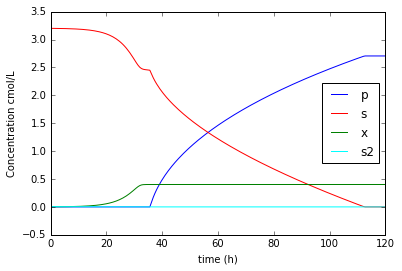

In [8]:
N1, tspan = solve_ferm(120)

The discontinuity on the substrate profile indicates the discrete switch in the rate function. In practise the switch will be more gradual. You should see that the substrate is used to make biomass when $C_{S_2}$ is present in the fermetner. Let's plot the $C_{S_2}$ profile: 

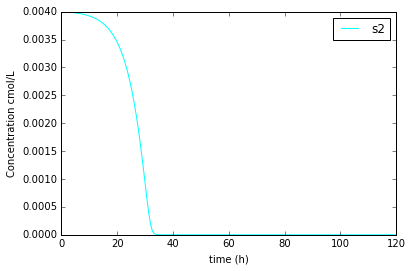

In [58]:
Cs2=N1[:,2]/N1[:,4]
Cp= N1[:,3]/N1[:,4]
Cs= N1[:,1]/N1[:,4]
plt.plot(tspan, Cs2, color='cyan',label='s2')
plt.legend(loc='best')
plt.ylabel('Concentration cmol/L') 
plt.xlabel('time (h)') 
plt.show()

Production of fumaric acid commences once $C_{S_2}$ is depleted. The bend in the product profile relates to the inhibition effect of $C_P$ on $\lambda$. This should be reflected in the instantaneous yields, where $\lambda$ decreases while $\theta$ remains constant until $C_S$ gets very low. Let's determine the instantaneous and accumulated fumeric acid yields:

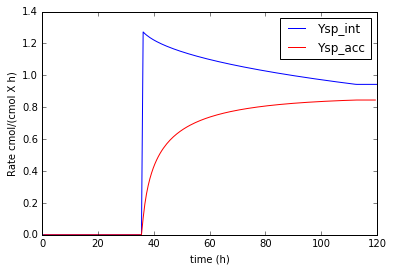

In [66]:
from numpy import asarray
Ci=(N1[:, :4].T/N1[:, 4]).T                  #first 4 elements of N devided by 5th element to get Ci, 
r=asarray([r_prime(C) for C in Ci])        # All Ci rows assigned (one by one) to function r_prime                             
rs=r[:,1]
rp=r[:,3]

Ysp_inst=rp/(-rs)
Ysp_acc=Cp[1:199]/(Cso-Cs[1:199])

plt.plot(tspan, Ysp_inst, color='blue',label='Ysp_int')
plt.plot(tspan[1:199], Ysp_acc, color='red',label='Ysp_acc')
plt.legend(loc='best')
plt.ylabel('Rate cmol/(cmol X h)') 
plt.xlabel('time (h)') 
plt.show()

A clear decrease in the instantaneous yield of fumarate on glucose is observed. This implies that at lower $\lambda$ a greater fraction of the glucose flux is used for respiration (maintenance energy). The overall yield exhibits an increase when production starts. The accumulated yield will always remain lower that the instantaneous yield since a significant fraction of substrate was used for making biomass prior to the production phase.

The yield can be altered by feeding less of $C_{S_2}$, but with less biomass in the fermenter there will be a sacrifice in productivity.

### $O_2$ and $CO_2$ rates:

It will also be interesting to quantify the oxygen and $CO_2$ depletion/formation rates. We can use the results from the 3 flux models. Let's start by converting the growth and maintenance stoichiometry matices to lists. This will be required for the function where we calculate the rates (r_prime_gasses) 

In [67]:
Yg1=numpy.array(Yg1).flatten().tolist()
Ym1=numpy.array(Ym1).flatten().tolist()

We can now calulate the instantaneous rates:

**Under growth conditions:**

$$r^{'}_{O_2}=Y_{XO}^G\cdot\mu+ Y_{ATP\,O}^M\cdot \theta $$

$$r^{'}_{CO_2}=Y_{XC}^G\cdot\mu+ Y_{ATP\,C}^M\cdot \theta $$

where the $CO_2$ is formed in respiration ($v_2$) and when forming biomass ($0.1v_1)$.

**Under non-growth conditions:**

$$r^{'}_{O_2}=Y_{SO}^{nG}\cdot\lambda $$

$$r^{'}_{CO_2}=Y_{SC}^{nG}\cdot\lambda $$

where the $CO_2$ is formed in respiration ($v_2$) and when forming fumarate ($0.25v_3)$.

We define these rates in a seperate function (although it can be combined with r_prime at a later stage)

In [51]:
def r_prime_gasses(C):
    
    Cx, Cs, Cs2, Cp = C          
    mu=mumax*Cs/(Km+Cs)*Cs2/(Km+Cs2)*(1+Cp/Kp)**(-1)
    theta=thetamax*Cs/(Km+Cs)
    lamda=lambdamax*Cs/(Km+Cs)*(1+Cp/Kp)**(-1)
    
    if mu > 0.0001:    #growth conditions
        
        return ([(Yg1[3]/Yg1[0])*mu+(Ym1[3]/Ym[4])*theta,    # oxygen depletion -note the difference between Yg1,Yg, Ym1 and Ym   
               ((Yg1[1]+0.1*Yg1[0])/Yg1[0])*mu+(Ym1[1]/Ym[4])*theta])   #CO2 formation
                
    else:           #non-growth
        
        Sng = numpy.matrix([[1.1,1,0.75,0],
                           [0.1,2,0,-2],
                           [-2.5,2/3,0,3],
                           [1,0,0,0]])          
        
        Cng = numpy.matrix([[1,0,theta/lamda,0]]).T
        Yng = numpy.linalg.solve(Sng,Cng)
        Yng = numpy.array(Yng).flatten().tolist()
        
        return  ([Yng[3]*lamda,                  #oxygen consumption
                (Yng[1]-Yng[2]*0.25)*lamda])    #CO2 formation

Given the output from the fermentation (N1), we can reconstruct the rates as a function of time and multiply with $C_X$ in order to obtain volumetric rates:

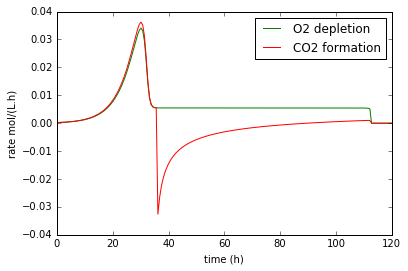

In [52]:
from numpy import asarray
Ci=(N1[:, :4].T/N1[:, 4]).T                  #first 4 elements of N devided by 5th element to get Ci, 
r=asarray([r_prime_gasses(C) for C in Ci])        # All Ci rows assigned (one by one) to function r_prime

Cx= N1[:,0]/N1[:,4]

ro=r[:,0]*Cx
rc=r[:,1]*Cx

plt.plot(tspan, ro, color='green', label='O2 depletion')
plt.plot(tspan, rc, color='red',label='CO2 formation')
plt.legend(loc='best')
plt.ylabel('rate mol/(L.h)') 
plt.xlabel('time (h)') 
plt.show()

Very interesting. It is clear that oxygen should be sparged at all times, while $CO_2$ should be sparged once growth seizes.

Most industrial fermentors use a $CO_2$ and $O_2$ online analyser in the exit gas stream (off-gas). Given known outlet/inlet flowrates and concentrations, a measured graph similar to the one above can be obtained. The turning or switching point in this fermentation can be predicted by merely monitoring the gas outlet. A useful tool for measuring the direct reponse of the microbes.  

<img src="analyze.jpg" width="500" />